# 14 Classification Task dengan Support Vector Machine (SVM)

Referensi: https://www.svm-tutorial.com/

### Konsep Dasar
#### Decision Boundary (Hyperplane)

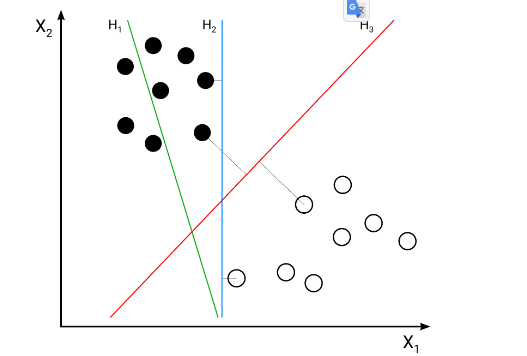

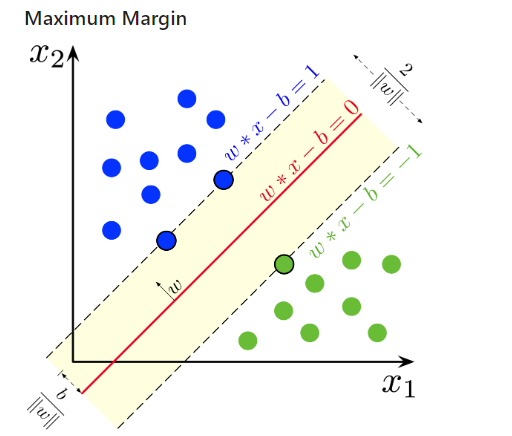

### Linearly Inseperable
### & Kernel Tricks
Referensi: https://www.quora.com/What-is-the-kernel-trick

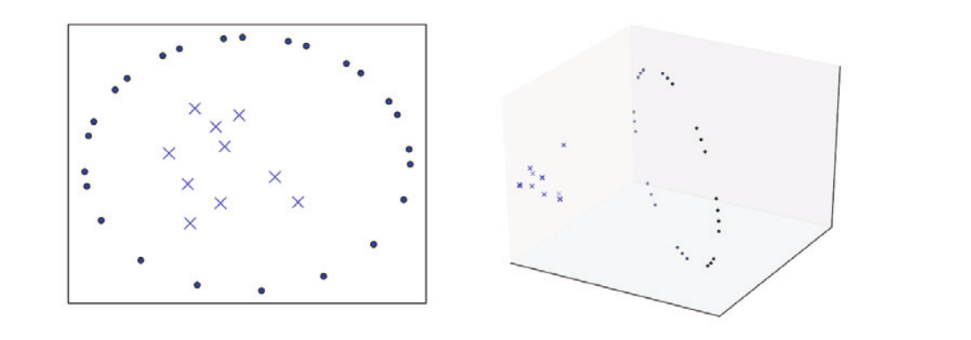

## Dataset: The MNIST database of handwritten digits
Referensi: http://yann.lecun.com/exdb/mnist/

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', data_home='./dataset/mnist', return_X_y=True)
X.shape

(70000, 784)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

pos = 1
for data in X.to_numpy()[:8]:
    plt.subplot(1, 8, pos)
    plt.imshow(data.reshape((28, 28)), 
               cmap=cm.Greys_r)
    plt.axis('off')
    pos += 1

plt.show()

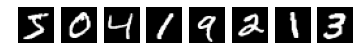

In [ ]:
y[:8]

In [ ]:
# X_train = X[:60000]
# y_train = y[:60000]
# X_test = X[60000:]
# y_test = y[60000:]

X_train = X[:1000]
y_train = y[:1000]
X_test = X[69000:]
y_test = y[69000:]

## Classification dengan SVC (Support Vector Classifier)

In [ ]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

### Hyperparameter Tuning dengan GridSearchCV
Referensi: https://en.wikipedia.org/wiki/Hyperparameter_optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           n_jobs=6,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

In [ ]:
print(f'Best Score: {grid_search.best_score_}')

best_params = grid_search.best_estimator_.get_params()
print(f'Best Parameters:')
for param in parameters:
    print(f'\t{param}: {best_params[param]}')

## Predict & Evaluate

In [ ]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))